In [28]:
import pickle
import pandas as pd
import numpy as np
data = pd.read_pickle("./data.pkl")

In [29]:
target_feature = 'title'
data = data.filter([target_feature + "_vector", 'label'])

In [30]:
data.head()

,title_vector,label
0,"[[0.6595936, 0.51315624, 0.29930714, 0.0358353...",1
1,"[[0.61800295, 0.31473106, -0.6350405, 0.099915...",1
2,"[[0.4370836, 0.6425256, -0.34794593, 0.1336654...",1
3,"[[0.47920132, 0.52537596, -0.5724726, 0.432976...",1
4,"[[0.79335517, 0.23477861, -0.13257661, -0.1356...",1


In [31]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, random_state=777, train_size=0.65)
print(train_data)
print(test_data)

                                           title_vector  label
3463  [[0.5552156, -0.16965698, -0.38498297, 0.41805...      0
1544  [[0.7770728, 0.691371, -0.5617533, 0.24750076,...      0
2578  [[0.22808988, 0.060332485, -0.5020853, 0.18747...      0
3528  [[0.6334721, 0.32261947, -0.20044172, -0.18055...      1
589   [[0.2520358, 0.16787434, -0.29778117, 0.075333...      1
...                                                 ...    ...
4212  [[0.87619215, 0.45379844, -0.122751236, -0.305...      1
2687  [[0.97706026, -0.30546528, -0.015893033, -0.20...      0
2119  [[0.6905516, 0.085860595, 0.030321244, -0.0475...      1
4017  [[0.26876533, 0.2418903, -0.06839772, 0.098044...      0
2982  [[0.54721344, 0.015975937, -0.43114954, 0.1802...      0

[2809 rows x 2 columns]
                                           title_vector  label
91    [[0.29445377, 0.7319299, -0.07019389, 0.248855...      1
4187  [[0.5947004, -0.34817788, -0.1250591, 0.287285...      1
2507  [[0.38071847, 0.5159382,

In [32]:
input_shape = train_data[target_feature + "_vector"].iloc[0].shape[1]

In [33]:
x_train = train_data[target_feature + "_vector"].values
y_train = train_data['label'].values
x_train = np.vstack(x_train)
y_train = np.vstack(y_train)

x_test = test_data[target_feature + "_vector"].values
y_test = test_data['label'].values
x_test = np.vstack(x_test)
y_test = np.vstack(y_test)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2809, 768)
(2809, 1)
(1513, 768)
(1513, 1)


In [18]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam

input_dim = x_train.shape[1]
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=input_dim))
model.add(Dense(1, activation='sigmoid'))

adam = Adam(lr=0.001)
model.compile(optimizer = adam,
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=100, verbose=2)

In [49]:
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.metrics import f1_score
kfold = StratifiedKFold(n_splits=5, shuffle=True)
cvscores = []
f1_scores = []
count = 1
for train, test in kfold.split(x_train, y_train):
    print("Fold {}".format(count))
    count += 1
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=input_dim))
    model.add(Dense(1, activation='sigmoid'))

    adam = Adam(lr=0.001)
    model.compile(optimizer = adam,
                loss='binary_crossentropy',
                metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=5, verbose=0)
    # evaluate the model
    scores = model.evaluate(x_train[test], y_train[test], verbose=0)
    y_pred = model.predict_classes(x_train[test], verbose=0)
    f1 = f1_score(y_train[test], y_pred)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
    f1_scores.append(f1 * 100)
print("Average accuracy : %.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))
print("Average F1 score : %.2f%% (+/- %.2f%%)" % (np.mean(f1_scores), np.std(f1_scores)))

Fold 1
acc: 94.66%
Fold 2
acc: 94.31%
Fold 3
acc: 93.95%
Fold 4
acc: 94.84%
Fold 5
acc: 95.37%
Average accuracy : 94.62% (+/- 0.48%)
Average F1 score : 94.34% (+/- 0.58%)


In [51]:
score = model.evaluate(x_test, y_test)
print("Evaluate on test data")
print("test loss, test acc:", score)

1513/1513 [==============================] - 0s 40us/step
Evaluate on test data
test loss, test acc: [0.25403138276211723, 0.898876404494382]


In [55]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_test, y_pred)

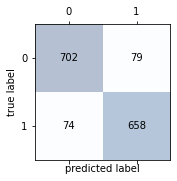

In [57]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i,j], va='center', ha='center')
plt.xlabel('predicted label')        
plt.ylabel('true label')
plt.show()